<a href="https://colab.research.google.com/github/rish-1412/codsoft_internship/blob/main/credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CREDIT CARD FRAUD DETECTION**

In [1]:
# Import libraries for data handling and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries for machine learning and handling imbalance
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_fscore_support
from imblearn.over_sampling import SMOTE  # Handling class imbalance

In [2]:
# Load the dataset
url = '/content/creditcard.csv'
data = pd.read_csv(url)

# Take a look at the first few rows
data.head()

# Check for missing values
print(data.isnull().sum())

# Display data summary
print(data.describe())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    1
Class     1
dtype: int64
               Time            V1            V2            V3            V4  \
count  13954.000000  13954.000000  13954.000000  13954.000000  13954.000000   
mean   10121.161817     -0.235676      0.284287      0.846047      0.302775   
std     7739.625811      1.720315      1.394804      1.561376      1.500595   
min        0.000000    -27.670569    -34.607649    -24.667741     -4.657545   
25%     2984.250000     -0.969786     -0.282728      0.407297     -0.623141   
50%     9086.500000     -0.319439      0.252904      0.960978      0.220104   
75%    17103.500000      1.162662      0.884741      1.607031 

In [3]:
# Normalize 'Amount' column
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data[['Amount']])

# Split data into features (X) and target (y)
X = data.drop('Class', axis=1)
y = data['Class']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# *** Handle missing values in y_train (if any) ***
# You can either remove rows with NaN values or impute them.
# Here, we'll remove rows with NaN values in 'Class' from the training set:
X_train = X_train[y_train.notna()]  # Keep rows where y_train is not NaN
y_train = y_train[y_train.notna()]  # Keep corresponding y_train values

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [4]:
# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

In [9]:
# Initialize Logistic Regression
lr_model = LogisticRegression(max_iter=100, random_state=42)

# Train the model
lr_model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random Forest Classifier Performance:
Accuracy: 0.9989
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2781
         1.0       0.89      0.80      0.84        10

    accuracy                           1.00      2791
   macro avg       0.94      0.90      0.92      2791
weighted avg       1.00      1.00      1.00      2791

Logistic Regression Performance:
Accuracy: 0.9950
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2781
         1.0       0.40      0.80      0.53        10

    accuracy                           0.99      2791
   macro avg       0.70      0.90      0.77      2791
weighted avg       1.00      0.99      1.00      2791



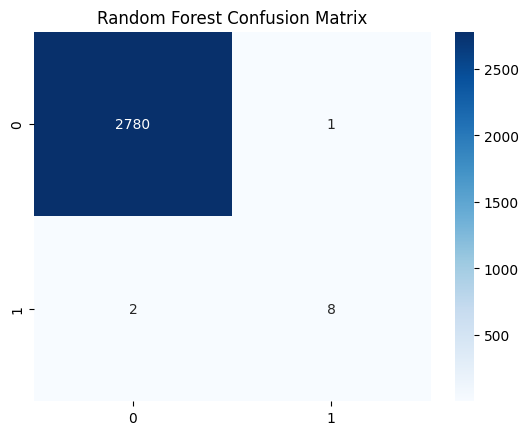

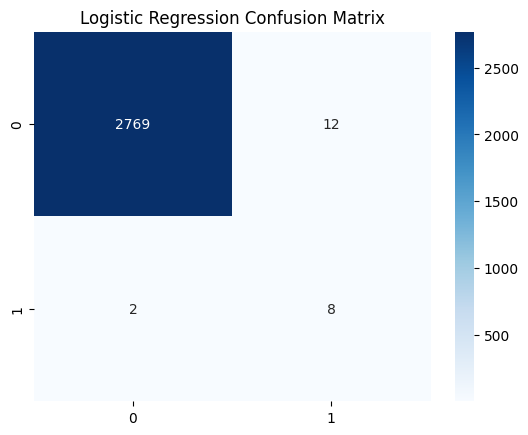

In [6]:
# Random Forest Evaluation
print("Random Forest Classifier Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Logistic Regression Evaluation
print("Logistic Regression Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

# Confusion Matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.show()

# Confusion Matrix for Logistic Regression
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

In [7]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf, recall_rf, f1_rf, _ = precision_recall_fscore_support(y_test, y_pred_rf, average='binary')

print(f"Random Forest - Accuracy: {accuracy_rf:.4f}, Precision: {precision_rf:.4f}, Recall: {recall_rf:.4f}, F1-Score: {f1_rf:.4f}")

Random Forest - Accuracy: 0.9989, Precision: 0.8889, Recall: 0.8000, F1-Score: 0.8421


In [8]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr, recall_lr, f1_lr, _ = precision_recall_fscore_support(y_test, y_pred_lr, average='binary')

print(f"Logistic Regression - Accuracy: {accuracy_lr:.4f}, Precision: {precision_lr:.4f}, Recall: {recall_lr:.4f}, F1-Score: {f1_lr:.4f}")

Logistic Regression - Accuracy: 0.9950, Precision: 0.4000, Recall: 0.8000, F1-Score: 0.5333
